1. Importing libraries

In [136]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

2. Reading the data

In [137]:
DIR_PATH = "/Users/abhisheksaurav/Desktop/bike_project/data/cleaned_data"
FILE_NAME = "train_data"

df_train = pd.read_csv(f"{DIR_PATH}/{FILE_NAME}.csv", index_col= 0)
df_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_July,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,holiday_Yes,weekday_Tue,weekday_Wed,weathersit_Light Precipitation,weathersit_Misty Skies,cnt
247,0.941813,0.896189,1.094484,0.352149,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,3351
335,-1.029248,-0.922897,-0.063061,-1.144131,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3940
702,-0.142044,-0.072002,0.695937,-0.163360,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,6606
440,0.068329,0.150533,0.851250,-1.011134,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,7836
136,0.329003,0.357555,1.428559,1.216404,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4123


In [138]:
DIR_PATH = "/Users/abhisheksaurav/Desktop/bike_project/data/cleaned_data"
FILE_NAME = "test_data"

df_test = pd.read_csv(f"{DIR_PATH}/{FILE_NAME}.csv", index_col= 0)
df_test.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_July,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,holiday_Yes,weekday_Tue,weekday_Wed,weathersit_Light Precipitation,weathersit_Misty Skies,cnt
468,-0.036858,0.045115,-0.927548,0.061038,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7460
148,0.909802,0.833767,1.293755,0.368750,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,4788
302,-1.001808,-0.985369,-0.077711,-0.130104,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,3331
355,-0.430158,-0.337451,0.862974,-1.858961,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3068
515,0.978401,0.931327,-0.997880,0.119343,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,7338


3. Splitting the data

In [139]:
X_train = df_train.drop('cnt', axis = 1)
y_train = df_train['cnt']

X_test = df_test.drop('cnt', axis = 1)
y_test = df_test['cnt']

4. Model Development

In [140]:
X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_July,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,holiday_Yes,weekday_Tue,weekday_Wed,weathersit_Light Precipitation,weathersit_Misty Skies
247,0.941813,0.896189,1.094484,0.352149,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
335,-1.029248,-0.922897,-0.063061,-1.144131,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
702,-0.142044,-0.072002,0.695937,-0.163360,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
440,0.068329,0.150533,0.851250,-1.011134,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
136,0.329003,0.357555,1.428559,1.216404,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


<Axes: >

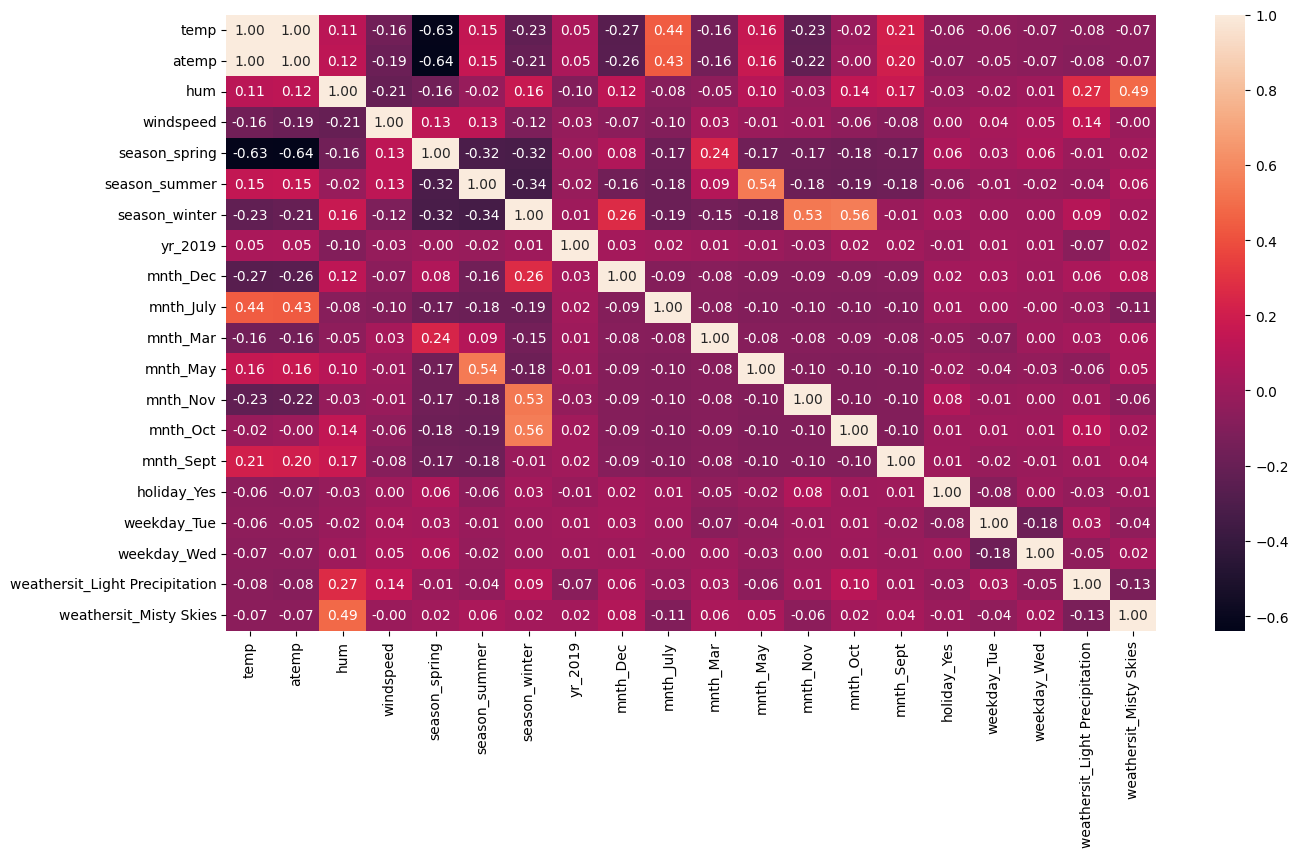

In [141]:
# checking correlation

plt.figure(figsize= (15, 8))
sns.heatmap(X_train.corr(), 
            annot= True,
            fmt= ".2f")

- `atemp` is higly collinear with `temp` because it is derived from the `temp` column. 
- As the `temp` is the original column we will drop the `atemp` column. 

In [142]:
(
    X_train.drop(['atemp'], 
                 axis = 1, 
                 inplace= True)
)

<Axes: >

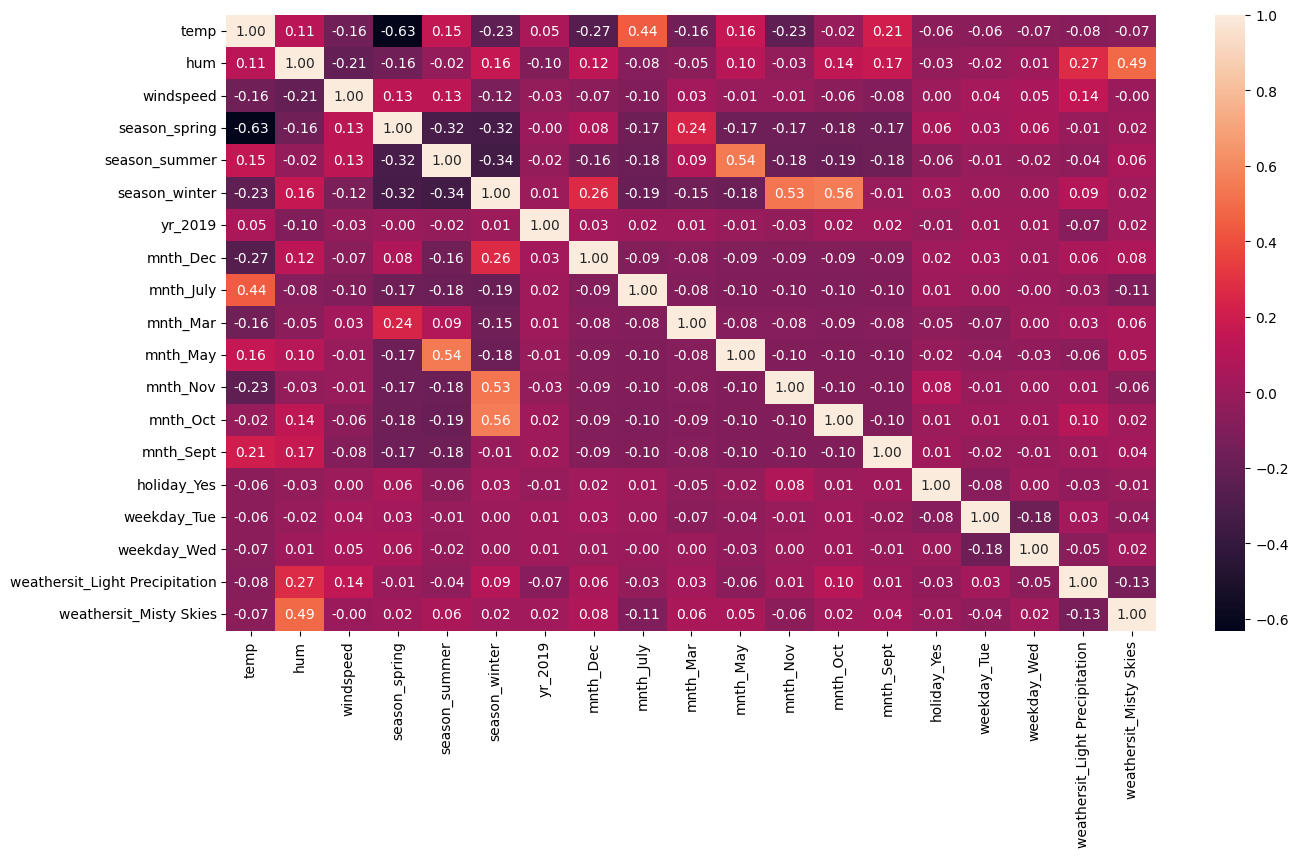

In [143]:
# checking collinearity once again 

plt.figure(figsize= (15, 8))
sns.heatmap(X_train.corr(), 
            annot= True,
            fmt= ".2f")

Building the model

In [144]:
import statsmodels.api as sm 

# adding constant 

X_train_sm = sm.add_constant(X_train)

X_train_sm.head()

,const,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_July,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,holiday_Yes,weekday_Tue,weekday_Wed,weathersit_Light Precipitation,weathersit_Misty Skies
247,1.0,0.941813,1.094484,0.352149,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
335,1.0,-1.029248,-0.063061,-1.144131,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
702,1.0,-0.142044,0.695937,-0.163360,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
440,1.0,0.068329,0.851250,-1.011134,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
136,1.0,0.329003,1.428559,1.216404,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [145]:
# Model 1 

# we will proceed with the backward elimination method 

lm1 = sm.OLS(y_train, X_train_sm).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     156.8
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.25e-210
Time:                        13:52:43   Log-Likelihood:                -4717.2
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     564   BIC:                             9562.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [146]:
# checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()

vif_data['Features'] = X_train.columns 
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif_data.sort_values(by= 'VIF', ascending= False)

,Features,VIF
5,season_winter,8.699544
12,mnth_Oct,4.261068
11,mnth_Nov,3.989240
0,temp,2.907826
3,season_spring,2.879562
7,mnth_Dec,2.300234
4,season_summer,2.267807
18,weathersit_Misty Skies,2.266275
6,yr_2019,2.057425
1,hum,1.891809


- `season_summer` has very high p-value which makes it statistically insignificant. so we will drop this column. 

In [147]:
X_train_sm.drop('season_summer', axis = 1, inplace= True)

In [148]:
lm2 = sm.OLS(y_train, X_train_sm).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     165.2
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          2.29e-211
Time:                        13:52:44   Log-Likelihood:                -4718.1
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     565   BIC:                             9557.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [149]:
# checking vif for model 2

vif_data = pd.DataFrame()

vif_data['Features'] = X_train.columns 
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif_data.sort_values(by= 'VIF', ascending= False)

,Features,VIF
5,season_winter,8.699544
12,mnth_Oct,4.261068
11,mnth_Nov,3.989240
0,temp,2.907826
3,season_spring,2.879562
7,mnth_Dec,2.300234
4,season_summer,2.267807
18,weathersit_Misty Skies,2.266275
6,yr_2019,2.057425
1,hum,1.891809


- `mnth_Oct` has very high p-value which makes it statistically insignificant. So I will drop this column. 

In [150]:
X_train_sm.drop('mnth_Oct', axis = 1, inplace= True)

In [151]:
# model 3 

lm3 = sm.OLS(y_train, X_train_sm).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     174.8
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          3.26e-212
Time:                        13:52:44   Log-Likelihood:                -4718.8
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     566   BIC:                             9552.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [152]:
# checking vif 

vif_data = pd.DataFrame()

vif_data['Features'] = X_train_sm.columns 
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i ) for i in range(X_train_sm.shape[1])]
vif_data.sort_values(by = 'VIF', ascending= False)

vif_data

,Features,VIF
0,const,7.357736
1,temp,3.519314
2,hum,1.973570
3,windspeed,1.187829
4,season_spring,2.984075
5,season_winter,2.392659
6,yr_2019,1.038088
7,mnth_Dec,1.315149
8,mnth_July,1.438283
9,mnth_Mar,1.121515


1. R-squared: 0.840 indicates that 84% of the variability in the `cnt` is explained by the independent variables. 
2. Adj. R-squared: 0.835 is slightly lower than the R squared  but close, meaning the model generalizes well without being overfitted. 
3. Most variables are statistically significant as their p-values is less than 0.05. 
4. Many variables have positive impact on the target variable like temp, season_winter, yr_2019 etc
5. Some variable highly negatively influenced the target variable. Some of them are: season_spring, mnth_Nov, holiday_Yes etc. 
6. Multicollineary Check: Condition no: 8.84 indicated that there is no severe multicollinearity issue as it is well below 30. 
7. Autocorrelation Check: DW = 1.991 is very close to 2, indicating no significant autocorrelation. 



5. Model Assumtions (Assumptions check for Linear Regression)

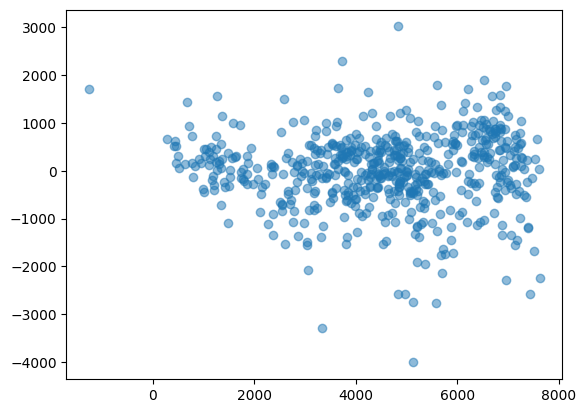

In [153]:
# Linearity 

# residual vs fitted plot 

residuals = lm3.resid 

# fitted values 
fitted_values = lm.fittedvalues

plt.scatter(fitted_values, residuals, alpha = 0.5)

- The residuals shows a slight pattern, but they are not heavily curved or highly non random. This suggests there are minor violations of linearity which may not significantly impact the model's predictive power. 

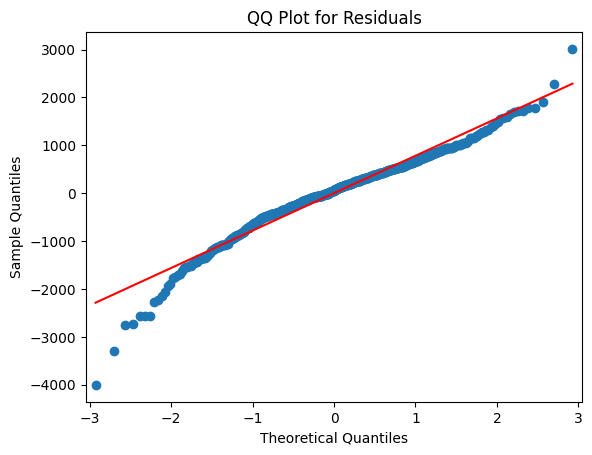

In [161]:
# Normality of residuals 

sm.qqplot(residuals, line = 's')
plt.title("QQ Plot for Residuals")
plt.show()

In [165]:
# shapiro wilk test 

from scipy.stats import shapiro 

stat, p_value = shapiro(residuals)
print(f"Shapiro Wilk Test Statistic: {stat: .2f}")
print(f"Shapiro Wilk test pvalue: {p_value:.3f}" )

Shapiro Wilk Test Statistic:  0.96
Shapiro Wilk test pvalue: 0.000


- Residuals follow closely the theoritical distribution which indicates that the Residuals are normally distributed. 
- Shapiro wilk test further confired that the residuals are indeed normally distributed. 
- Homoscedasticity check was already perfomed during the linearity check. 
- Independence of errors test was already perfomed during the model developement. Darbin Watson test indicated that there is no auto correlation. 
- 

6. Model Evaluation

In [176]:
# prediction on the test set 

# final columns
final_colums = X_train_sm.columns

X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[final_colums]

In [177]:
# prediction 

y_test_pred = lm3.predict(X_test_sm)

In [181]:
# calcualting metrics 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_test = r2_score(y_pred= y_test_pred, y_true= y_test)
rmse_test = np.sqrt(mean_squared_error(y_pred= y_test_pred, y_true= y_test))
mae_test = mean_absolute_error(y_pred=y_test_pred, y_true= y_test)


print(f"Test R squared: {r2_test:.2f}")
print(f"Test RMSE: {rmse_test: .2f}")
print(f"Test MAE: {mae_test: .2f}")

Test R squared: 0.86
Test RMSE:  697.31
Test MAE:  530.95


6. Final Equation

y = 3941.6688 + 826.5068 * `temp` - 208.6701 * `hum` - 214.0546 * `windspeed` -1166.1894 * `season_spring` + 812.5612 * `season_winter` + 1976.7323 `yr_2019`  -483.5179 * `mnth_Dec` -412.8924 * `mnth_July` + 417.3384 * `mnth_Mar` + 331.6302 * `mnth_May` -658.9710 * `mnth_Nov` + 517.2277 * `mnth_Sept` -643.7361 * `holiday_Yes` - 269.4753 * `weekday_Tue` -234.8908 * `weekday_Wed` -2053.4357 * `weathersit_Light Precipitation` -441.6686 * `weathersit_Misty Skies`